In [1]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
import os
import matplotlib.pyplot as plt#visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

df.dropna(inplace=True)
df = df.reset_index()[df.columns]
for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()

    X=df.copy()

#Tenure to categorical column
'''def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

X["tenure"]=X["tenure"].map(tenure_lab)'''

X=X.drop('Churn',1)
Y=df.Churn
X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()
num_cols   = [x for x in X.columns if x not in todummy_list]


for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)    
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

normalized_X = preprocessing.normalize(X[num_cols])
normalized_X = pd.DataFrame(normalized_X,columns=num_cols)
X=X.drop(num_cols,1)
X=pd.concat([X,normalized_X ],axis=1)
#X = X.merge(normalized_X,left_index=True,right_index=True,how = "left")



'''std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])
x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)'''

#print (X.isnull().sum())

#Converting strings Yes?No as 0's and 1's
le = LabelEncoder()
Y= le.fit_transform(Y)





In [2]:
X.shape

(7032, 41)

In [3]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    
   
        
        
        
    
 
    fpr, tpr, thresholds = roc_curve(y_test, predictions)


    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns

    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


In [4]:
'''-------------------------FEATURE SELECTION(mutual_info_classif)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(mutual_info_classif, k=13)
fit=test.fit(X,Y)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_selected=X[columns_selected]

print(x_selected.shape)


(7032, 13)


<--------------------------------------K-fold MLP------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7151553077710775
 ROC_AUC FOR FOLD  2 is 0.6951302764819661
 ROC_AUC FOR FOLD  3 is 0.6879053362157243
 ROC_AUC FOR FOLD  4 is 0.7101365916345396
 ROC_AUC FOR FOLD  5 is 0.6960680678190938
 ROC_AUC FOR FOLD  6 is 0.6897877544252373
 ROC_AUC FOR FOLD  7 is 0.7267545495999669
 ROC_AUC FOR FOLD  8 is 0.6783204825270488
 ROC_AUC FOR FOLD  9 is 0.6897514819881442
 ROC_AUC FOR FOLD  10 is 0.7291822955738935


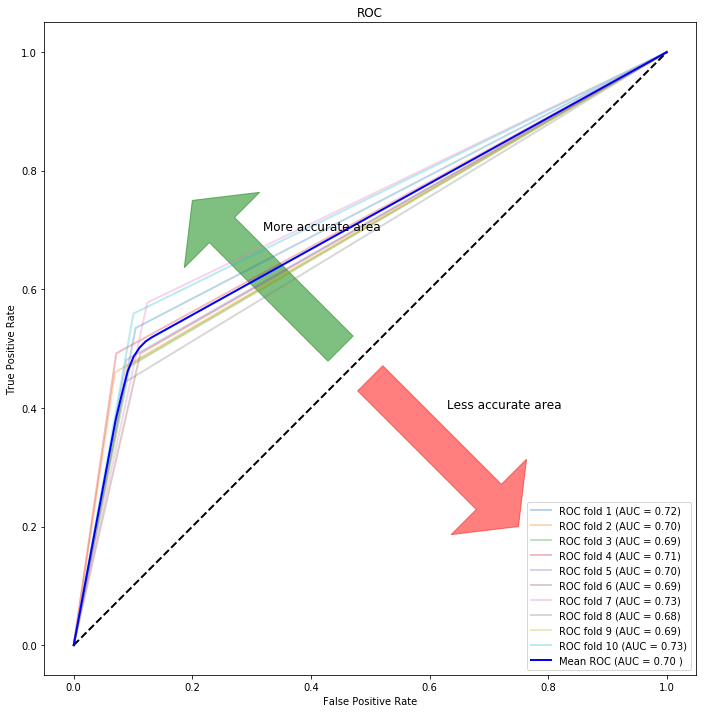

In [5]:
print("<--------------------------------------K-fold MLP------------------------------------->")
skf = StratifiedKFold(n_splits=10)
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='logistic', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=mlp.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		--------------LOGISTIC REGRESSION_Processed_mutual_info_classif----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7124815109796335
 ROC_AUC FOR FOLD  2 is 0.7119126180452839
 ROC_AUC FOR FOLD  3 is 0.7037205597906474
 ROC_AUC FOR FOLD  4 is 0.7357086597852672
 ROC_AUC FOR FOLD  5 is 0.6950990755710318
 ROC_AUC FOR FOLD  6 is 0.6988144094847242
 ROC_AUC FOR FOLD  7 is 0.7218370434854703
 ROC_AUC FOR FOLD  8 is 0.6870776851967003
 ROC_AUC FOR FOLD  9 is 0.7104423164614683
 ROC_AUC FOR FOLD  10 is 0.7261815453863465


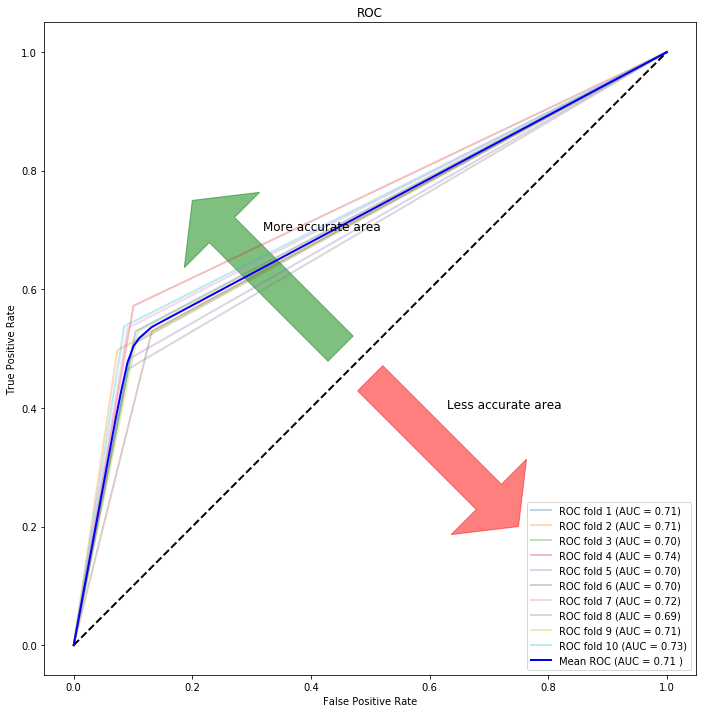

In [6]:
print ('\t\t--------------LOGISTIC REGRESSION_Processed_mutual_info_classif----------------\n\n\n')
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		--------------S.V.M_processed_mutual_info_classif----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.6771532597565137
 ROC_AUC FOR FOLD  2 is 0.667368301285698
 ROC_AUC FOR FOLD  3 is 0.6528615314597792
 ROC_AUC FOR FOLD  4 is 0.6692938274675622
 ROC_AUC FOR FOLD  5 is 0.6318606723873481
 ROC_AUC FOR FOLD  6 is 0.6768851303735025
 ROC_AUC FOR FOLD  7 is 0.6763099531567384
 ROC_AUC FOR FOLD  8 is 0.6430222194586079
 ROC_AUC FOR FOLD  9 is 0.6547226713095385
 ROC_AUC FOR FOLD  10 is 0.6947986996749188


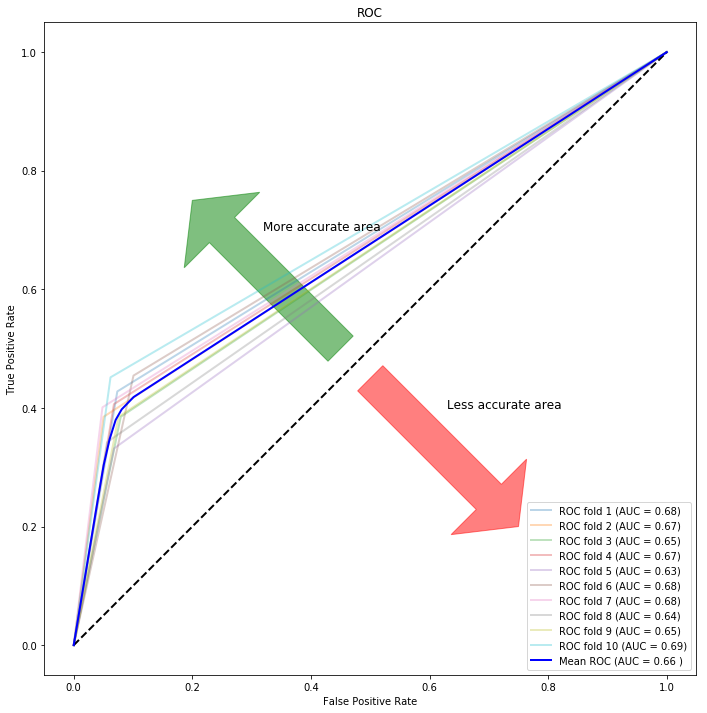

In [7]:
print ('\t\t--------------S.V.M_processed_mutual_info_classif----------------\n\n\n')
from sklearn.svm import SVC
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=SVM.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		-------------------Naive Bayes_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7751735123449767
 ROC_AUC FOR FOLD  2 is 0.7627147570827172
 ROC_AUC FOR FOLD  3 is 0.7477528729093184
 ROC_AUC FOR FOLD  4 is 0.7678149483895038
 ROC_AUC FOR FOLD  5 is 0.772463002114165
 ROC_AUC FOR FOLD  6 is 0.7110382207851428
 ROC_AUC FOR FOLD  7 is 0.7561870414127596
 ROC_AUC FOR FOLD  8 is 0.7423154251129627
 ROC_AUC FOR FOLD  9 is 0.7471966587903659
 ROC_AUC FOR FOLD  10 is 0.7474681170292573


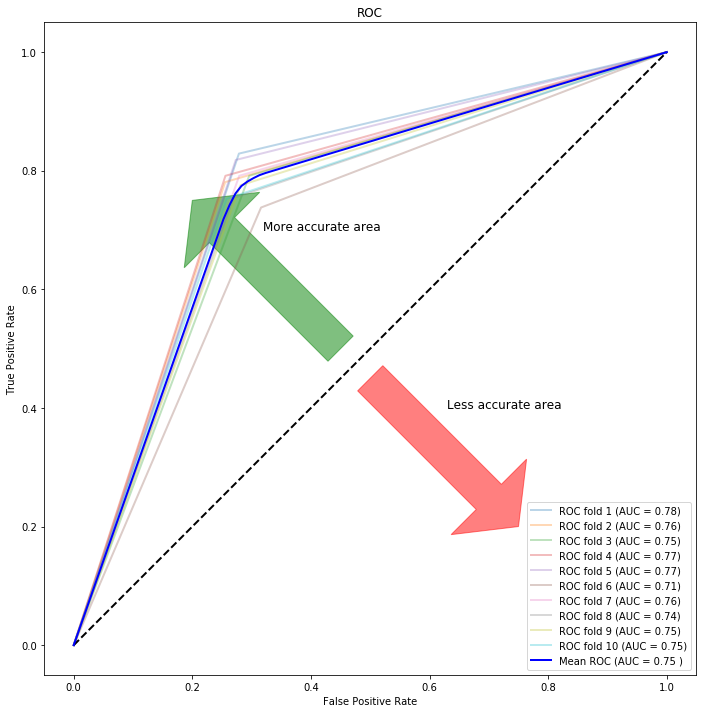

In [8]:

from sklearn.naive_bayes import GaussianNB
print ('\t\t-------------------Naive Bayes_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
gnb=GaussianNB()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_selected, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    gnb_kf=gnb.fit(X.iloc[train_index],Y[train_index])
    pred=gnb_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		-------------------SVM_W_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.6868813289338946 and tpr is [0.         0.44919786 1.        ]
 ROC_AUC FOR FOLD  2 is 0.6865968824667197 and tpr is [0.         0.43315508 1.        ]
 ROC_AUC FOR FOLD  3 is 0.6832973034474912 and tpr is [0.         0.46524064 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7147483729221075 and tpr is [0.        0.4973262 1.       ]
 ROC_AUC FOR FOLD  5 is 0.6812274592712348 and tpr is [0.         0.44385027 1.        ]
 ROC_AUC FOR FOLD  6 is 0.6854091530904116 and tpr is [0.         0.48128342 1.        ]
 ROC_AUC FOR FOLD  7 is 0.69823923226796 and tpr is [0.         0.47593583 1.        ]
 ROC_AUC FOR FOLD  8 is 0.6749108734402852 and tpr is [0.         0.43315508 1.        ]
 ROC_AUC FOR FOLD  9 is 0.6729728889441611 and tpr is [0.         0.43315508 1.        ]
 ROC_AUC FOR FOLD  10 is 0.7026444111027756 and tpr is [0.         0.47311828 1.        ]


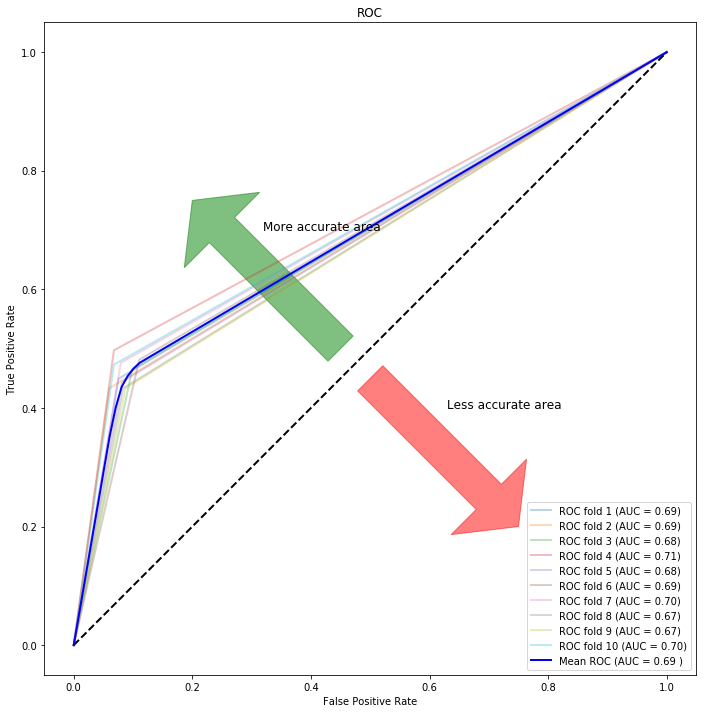

In [9]:
print ('\t\t-------------------SVM_W_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
skf = StratifiedKFold(n_splits=10)
svm=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)
skf = StratifiedKFold(n_splits=10)

print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    svm_kf=svm.fit(X.iloc[train_index],Y[train_index])
    pred=svm_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7385936966662875 and tpr is [0.         0.62032086 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7302878598247811 and tpr is [0.         0.58823529 1.        ]
 ROC_AUC FOR FOLD  3 is 0.7259073842302879 and tpr is [0.         0.57754011 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7423309704431456 and tpr is [0.         0.62032086 1.        ]
 ROC_AUC FOR FOLD  5 is 0.6830048086888032 and tpr is [0.         0.49197861 1.        ]
 ROC_AUC FOR FOLD  6 is 0.6757192306097914 and tpr is [0.         0.48128342 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7352422998797828 and tpr is [0.        0.5828877 1.       ]
 ROC_AUC FOR FOLD  8 is 0.6574690129751689 and tpr is [0.         0.43315508 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7299309787339883 and tpr is [0.         0.59358289 1.        ]
 ROC_AUC FOR FOLD  10 is 0.742716929232308 and tpr is [0.         0.60752688 1.  

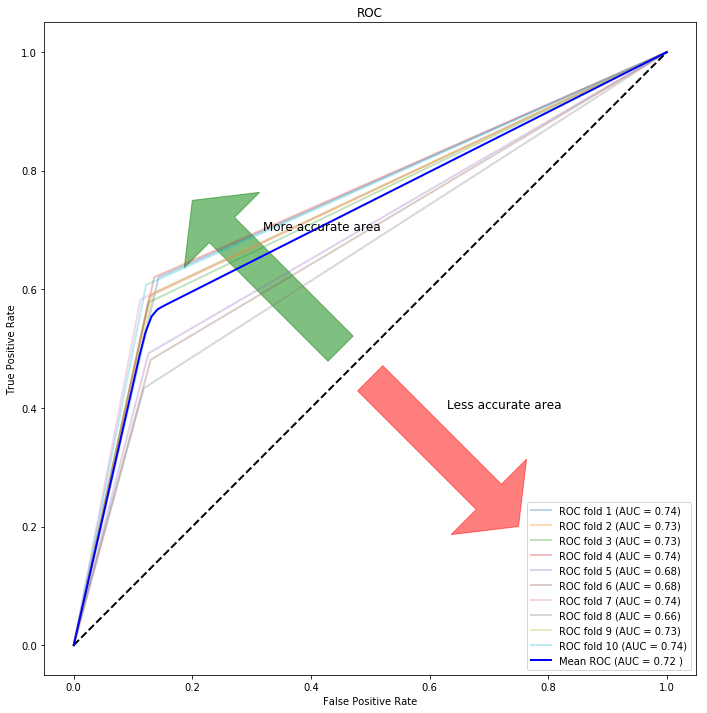

In [10]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------""")
from sklearn.tree import DecisionTreeClassifier
import matplotlib.patches as patches
import matplotlib.pylab as plt

clf_gini = DecisionTreeClassifier(max_depth = 5)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_gini_kf=clf_gini.fit(X.iloc[train_index],Y[train_index])
    pred=clf_gini.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------K-fold RANDOM FOREST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7178291045625214
 ROC_AUC FOR FOLD  2 is 0.7007623165320286
 ROC_AUC FOR FOLD  3 is 0.6691887586756172
 ROC_AUC FOR FOLD  4 is 0.7174947145877378
 ROC_AUC FOR FOLD  5 is 0.6785899349168845
 ROC_AUC FOR FOLD  6 is 0.6594432699083862
 ROC_AUC FOR FOLD  7 is 0.7232723956390167
 ROC_AUC FOR FOLD  8 is 0.689518302035402
 ROC_AUC FOR FOLD  9 is 0.7082348795755089
 ROC_AUC FOR FOLD  10 is 0.692516879219805


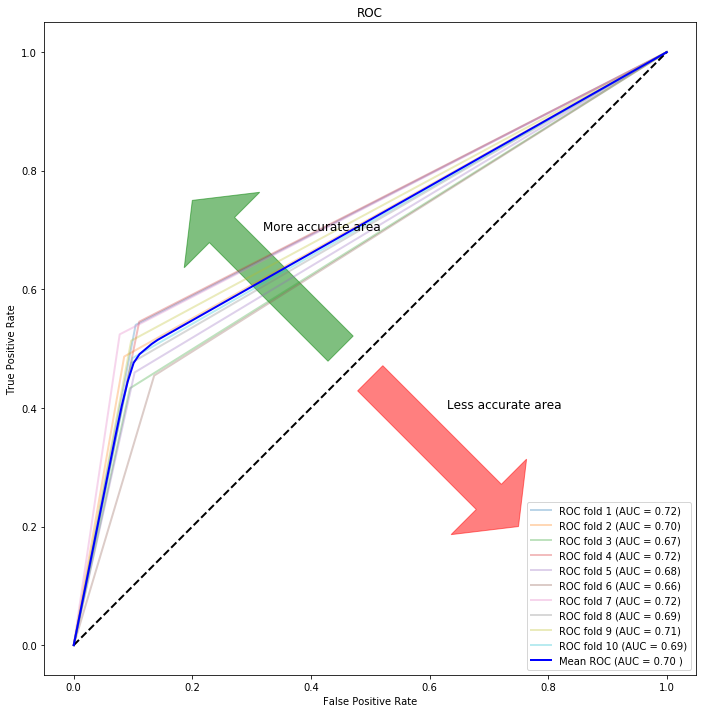

In [11]:
print("<--------------------------------------K-fold RANDOM FOREST------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=150)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=model.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------KNN_KF------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7030378882694277
 ROC_AUC FOR FOLD  2 is 0.7119695073387188
 ROC_AUC FOR FOLD  3 is 0.7127090681533734
 ROC_AUC FOR FOLD  4 is 0.7605086432035816
 ROC_AUC FOR FOLD  5 is 0.7082348795755089
 ROC_AUC FOR FOLD  6 is 0.7014882062761679
 ROC_AUC FOR FOLD  7 is 0.7145877378435518
 ROC_AUC FOR FOLD  8 is 0.6961043402561871
 ROC_AUC FOR FOLD  9 is 0.7070689798117978
 ROC_AUC FOR FOLD  10 is 0.7091772943235809


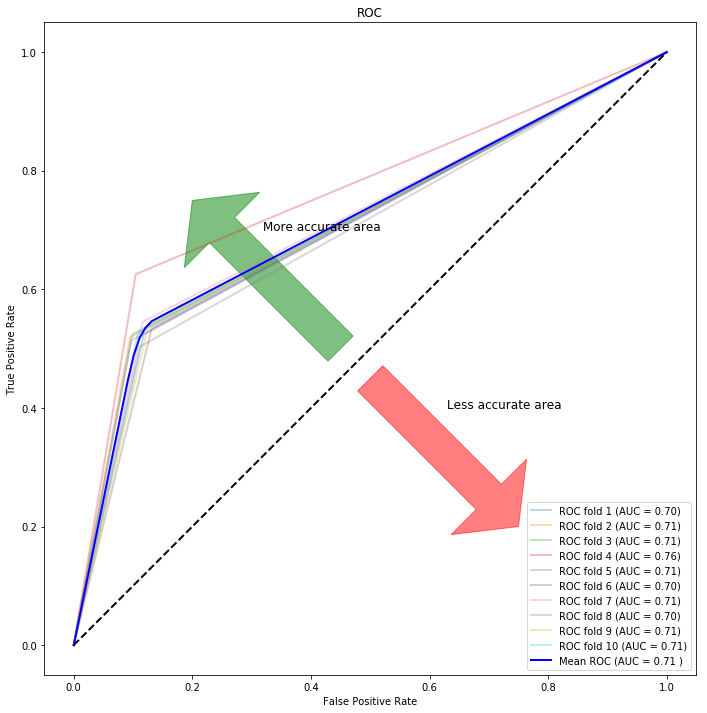

In [12]:
print("<--------------------------------------KNN_KF------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import matplotlib.patches as patches
import matplotlib.pylab as plt

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=70)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=KN.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------K-fold XG-BOOST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7164068722266469
 ROC_AUC FOR FOLD  2 is 0.7238593696666286
 ROC_AUC FOR FOLD  3 is 0.6974058482193651
 ROC_AUC FOR FOLD  4 is 0.7340038552418854
 ROC_AUC FOR FOLD  5 is 0.6917257389213614
 ROC_AUC FOR FOLD  6 is 0.7116807610993657
 ROC_AUC FOR FOLD  7 is 0.7419889731791236
 ROC_AUC FOR FOLD  8 is 0.6950990755710318
 ROC_AUC FOR FOLD  9 is 0.7089706918708286
 ROC_AUC FOR FOLD  10 is 0.7161790447611902


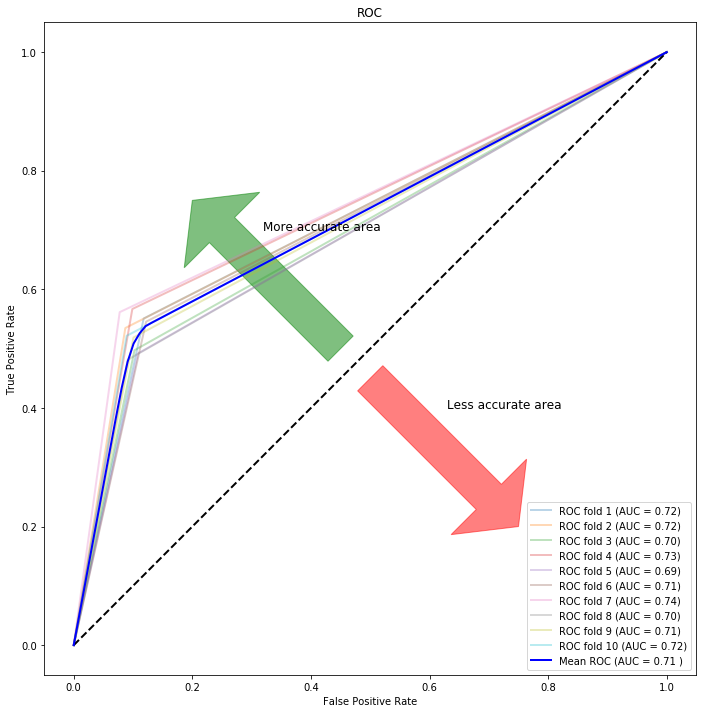

In [13]:
print("<--------------------------------------K-fold XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_selected, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=clf.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [14]:
'''-------------------------FEATURE SELECTION(chi2)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(chi2, k=13)
fit=test.fit(X,Y)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_selected=X[columns_selected]

print(x_selected.shape)


(7032, 13)


<--------------------------------------K-fold MLP------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7222095801570143
 ROC_AUC FOR FOLD  2 is 0.7109455000568893
 ROC_AUC FOR FOLD  3 is 0.702525884628513
 ROC_AUC FOR FOLD  4 is 0.7483781038842598
 ROC_AUC FOR FOLD  5 is 0.7050947228785807
 ROC_AUC FOR FOLD  6 is 0.6995502217800438
 ROC_AUC FOR FOLD  7 is 0.7235781204659454
 ROC_AUC FOR FOLD  8 is 0.7000165816855283
 ROC_AUC FOR FOLD  9 is 0.7153235501388716
 ROC_AUC FOR FOLD  10 is 0.7175856464116028


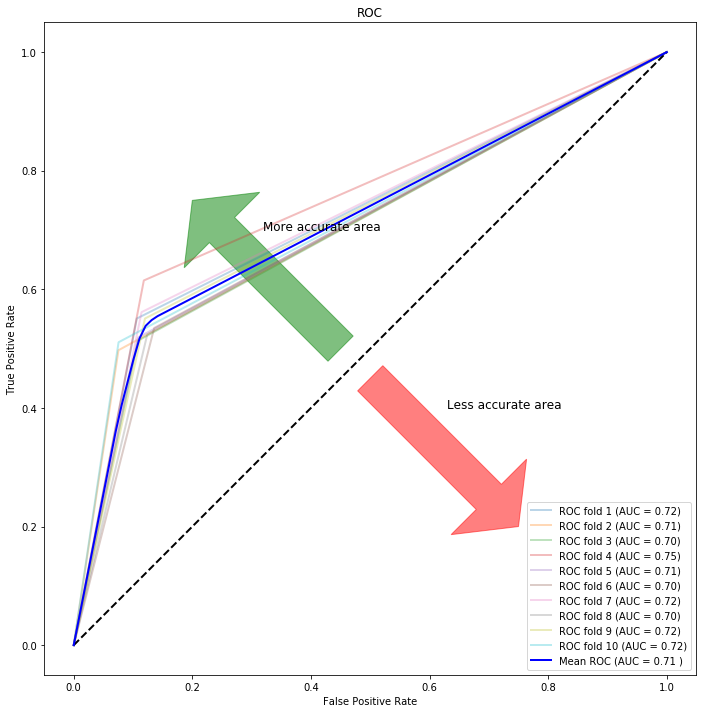

In [15]:
print("<--------------------------------------K-fold MLP------------------------------------->")
skf = StratifiedKFold(n_splits=10)
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='logistic', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=mlp.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		--------------LOGISTIC REGRESSION_Processed_chi2----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7124815109796335 and tpr is [0.         0.52941176 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7119126180452839 and tpr is [0.        0.4973262 1.       ]
 ROC_AUC FOR FOLD  3 is 0.7037205597906474 and tpr is [0.         0.50802139 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7357086597852672 and tpr is [0.         0.57219251 1.        ]
 ROC_AUC FOR FOLD  5 is 0.6950990755710318 and tpr is [0.         0.48128342 1.        ]
 ROC_AUC FOR FOLD  6 is 0.6988144094847242 and tpr is [0.         0.52941176 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7218370434854703 and tpr is [0.         0.53475936 1.        ]
 ROC_AUC FOR FOLD  8 is 0.6870776851967003 and tpr is [0.         0.46524064 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7104423164614683 and tpr is [0.         0.52941176 1.        ]
 ROC_AUC FOR FOLD  10 is 0.7261815453863465 and tpr is [0.         0.53763441 1.        ]


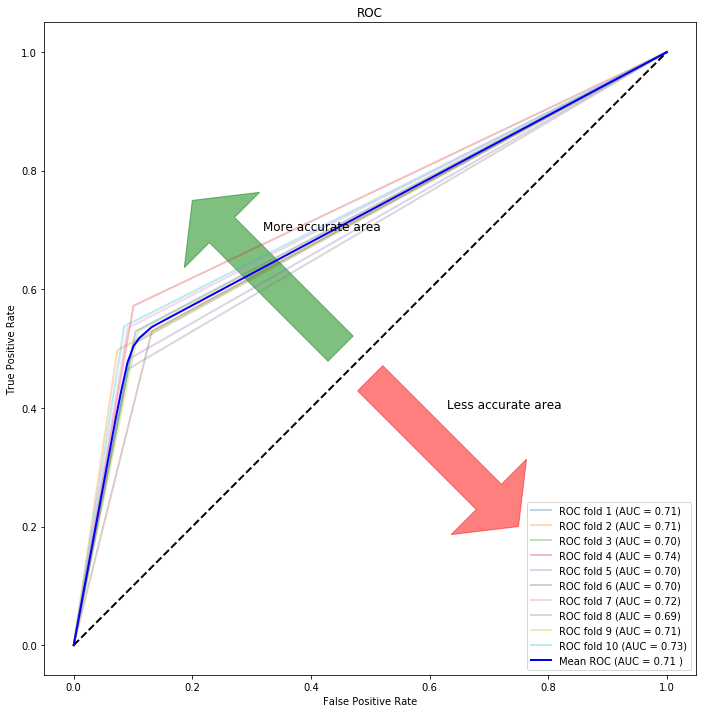

In [16]:
print ('\t\t--------------LOGISTIC REGRESSION_Processed_chi2----------------\n\n\n')
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		--------------S.V.M_processed_chi2----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.6771532597565137
 ROC_AUC FOR FOLD  2 is 0.667368301285698
 ROC_AUC FOR FOLD  3 is 0.6528615314597792
 ROC_AUC FOR FOLD  4 is 0.6692938274675622
 ROC_AUC FOR FOLD  5 is 0.6318606723873481
 ROC_AUC FOR FOLD  6 is 0.6768851303735025
 ROC_AUC FOR FOLD  7 is 0.6763099531567384
 ROC_AUC FOR FOLD  8 is 0.6430222194586079
 ROC_AUC FOR FOLD  9 is 0.6547226713095385
 ROC_AUC FOR FOLD  10 is 0.6947986996749188


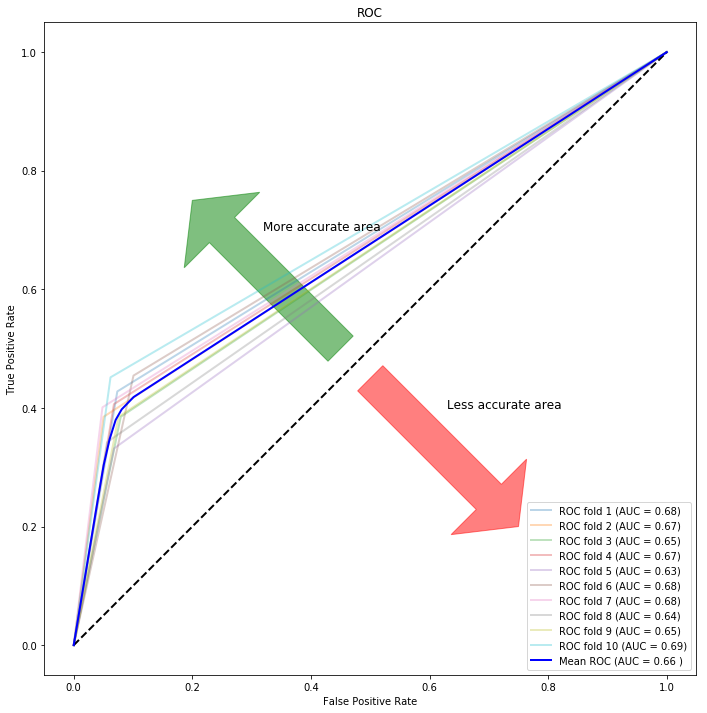

In [17]:
print ('\t\t--------------S.V.M_processed_chi2----------------\n\n\n')
from sklearn.svm import SVC
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=SVM.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		-------------------Naive Bayes_Feature_chi2----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7751735123449767 and tpr is [0.         0.82887701 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7627147570827172 and tpr is [0.         0.78074866 1.        ]
 ROC_AUC FOR FOLD  3 is 0.7477528729093184 and tpr is [0.         0.79144385 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7678149483895038 and tpr is [0.         0.79144385 1.        ]
 ROC_AUC FOR FOLD  5 is 0.772463002114165 and tpr is [0.         0.81818182 1.        ]
 ROC_AUC FOR FOLD  6 is 0.7110382207851428 and tpr is [0.         0.73796791 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7561870414127596 and tpr is [0.         0.79144385 1.        ]
 ROC_AUC FOR FOLD  8 is 0.7423154251129627 and tpr is [0.        0.7540107 1.       ]
 ROC_AUC FOR FOLD  9 is 0.7471966587903659 and tpr is [0.         0.77540107 1.        ]
 ROC_AUC FOR FOLD  10 is 0.7474681170292573 and tpr is [0.         0.75268817 1.        ]


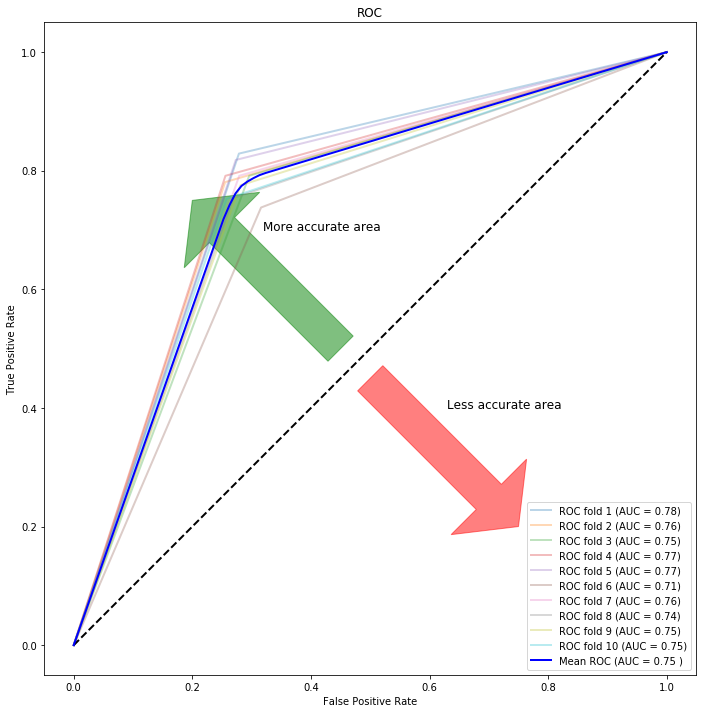

In [18]:

from sklearn.naive_bayes import GaussianNB
print ('\t\t-------------------Naive Bayes_Feature_chi2----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
gnb=GaussianNB()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_selected, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    gnb_kf=gnb.fit(X.iloc[train_index],Y[train_index])
    pred=gnb_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		-------------------SVM_W_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.6868813289338946
 ROC_AUC FOR FOLD  2 is 0.6865968824667197
 ROC_AUC FOR FOLD  3 is 0.6832973034474912
 ROC_AUC FOR FOLD  4 is 0.7147483729221075
 ROC_AUC FOR FOLD  5 is 0.6812274592712348
 ROC_AUC FOR FOLD  6 is 0.6854091530904116
 ROC_AUC FOR FOLD  7 is 0.69823923226796
 ROC_AUC FOR FOLD  8 is 0.6749108734402852
 ROC_AUC FOR FOLD  9 is 0.6729728889441611
 ROC_AUC FOR FOLD  10 is 0.7026444111027756


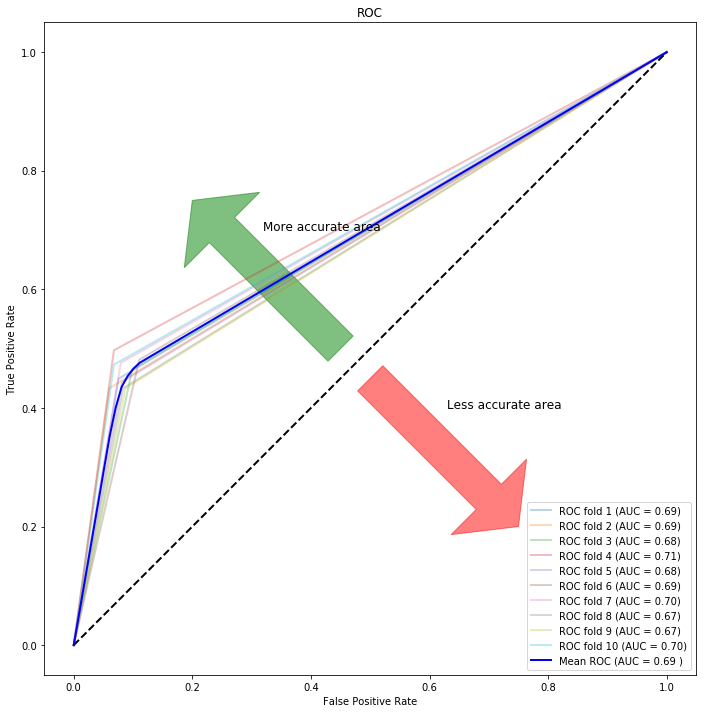

In [19]:
print ('\t\t-------------------SVM_W_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
skf = StratifiedKFold(n_splits=10)
svm=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)
skf = StratifiedKFold(n_splits=10)

print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    svm_kf=svm.fit(X.iloc[train_index],Y[train_index])
    pred=svm_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7385936966662875 and tpr is [0.         0.62032086 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7302878598247811 and tpr is [0.         0.58823529 1.        ]
 ROC_AUC FOR FOLD  3 is 0.7259073842302879 and tpr is [0.         0.57754011 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7423309704431456 and tpr is [0.         0.62032086 1.        ]
 ROC_AUC FOR FOLD  5 is 0.6830048086888032 and tpr is [0.         0.49197861 1.        ]
 ROC_AUC FOR FOLD  6 is 0.6757192306097914 and tpr is [0.         0.48128342 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7352422998797828 and tpr is [0.        0.5828877 1.       ]
 ROC_AUC FOR FOLD  8 is 0.6574690129751689 and tpr is [0.         0.43315508 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7299309787339883 and tpr is [0.         0.59358289 1.        ]
 ROC_AUC FOR FOLD  10 is 0.742716929232308 and tpr is [0.         0.60752688 1.  

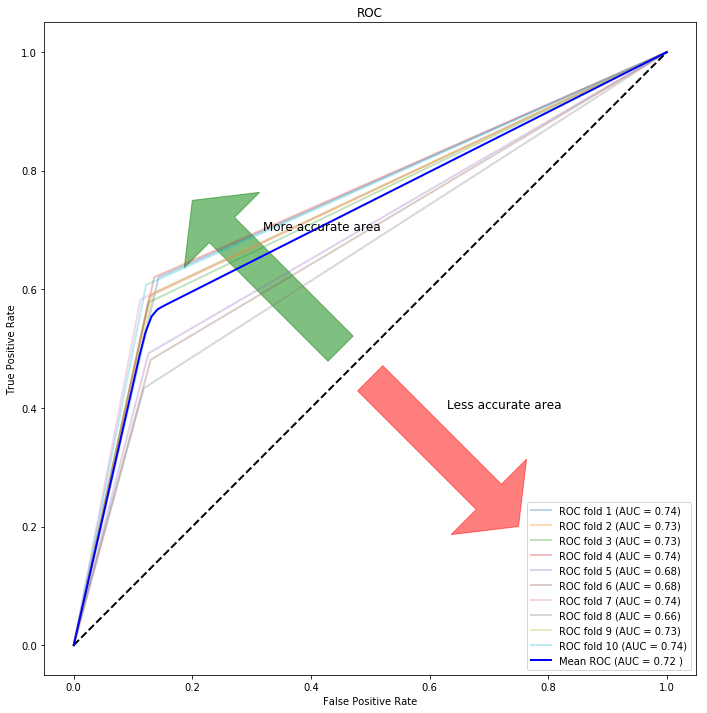

In [20]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------""")
from sklearn.tree import DecisionTreeClassifier
import matplotlib.patches as patches
import matplotlib.pylab as plt

clf_gini = DecisionTreeClassifier(max_depth = 5)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_gini_kf=clf_gini.fit(X.iloc[train_index],Y[train_index])
    pred=clf_gini.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------K-fold RANDOM FOREST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7071339173967458
 ROC_AUC FOR FOLD  2 is 0.7000227557173739
 ROC_AUC FOR FOLD  3 is 0.6818181818181819
 ROC_AUC FOR FOLD  4 is 0.700716121543755
 ROC_AUC FOR FOLD  5 is 0.6749471458773785
 ROC_AUC FOR FOLD  6 is 0.6526240517348588
 ROC_AUC FOR FOLD  7 is 0.7106392239771172
 ROC_AUC FOR FOLD  8 is 0.6866113252912159
 ROC_AUC FOR FOLD  9 is 0.6965707001616716
 ROC_AUC FOR FOLD  10 is 0.6907976994248562


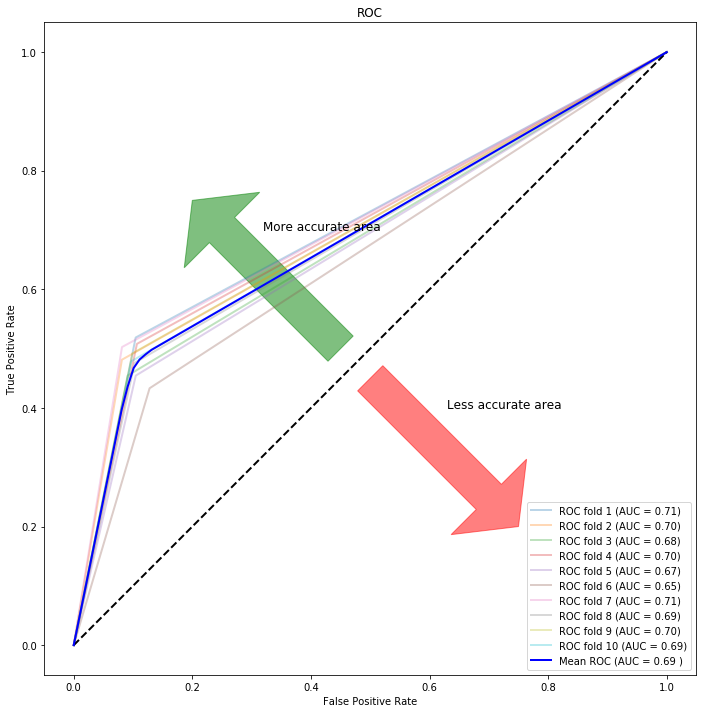

In [21]:
print("<--------------------------------------K-fold RANDOM FOREST------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=150)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=model.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------KNN_KF------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7030378882694277
 ROC_AUC FOR FOLD  2 is 0.7119695073387188
 ROC_AUC FOR FOLD  3 is 0.7127090681533734
 ROC_AUC FOR FOLD  4 is 0.7605086432035816
 ROC_AUC FOR FOLD  5 is 0.7082348795755089
 ROC_AUC FOR FOLD  6 is 0.7014882062761679
 ROC_AUC FOR FOLD  7 is 0.7145877378435518
 ROC_AUC FOR FOLD  8 is 0.6961043402561871
 ROC_AUC FOR FOLD  9 is 0.7070689798117978
 ROC_AUC FOR FOLD  10 is 0.7091772943235809


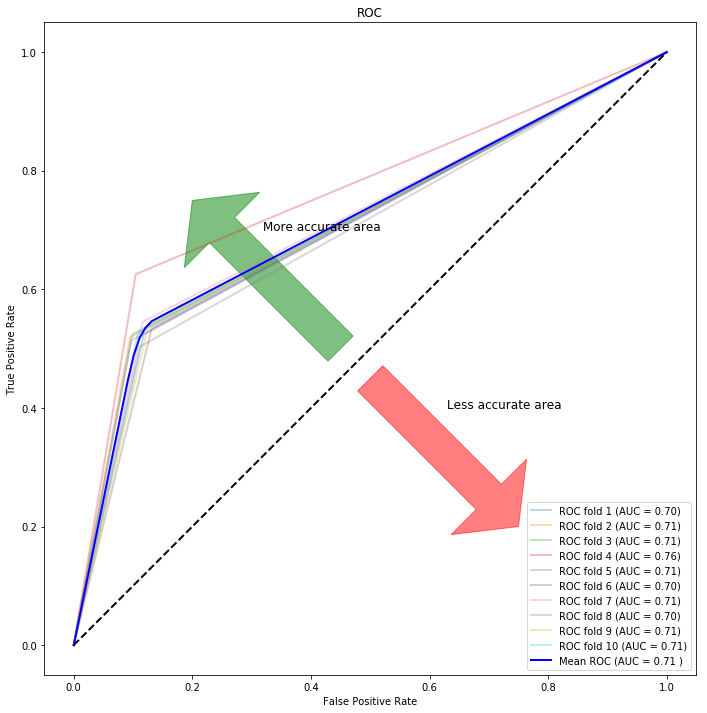

In [22]:
print("<--------------------------------------KNN_KF------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import matplotlib.patches as patches
import matplotlib.pylab as plt

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=70)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=KN.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------K-fold XG-BOOST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7164068722266469 and tpr is [0.         0.55080214 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7238593696666286 and tpr is [0.         0.53475936 1.        ]
 ROC_AUC FOR FOLD  3 is 0.6974058482193651 and tpr is [0.        0.4973262 1.       ]
 ROC_AUC FOR FOLD  4 is 0.7340038552418854 and tpr is [0.         0.56684492 1.        ]
 ROC_AUC FOR FOLD  5 is 0.6917257389213614 and tpr is [0.         0.49197861 1.        ]
 ROC_AUC FOR FOLD  6 is 0.7116807610993657 and tpr is [0.         0.54545455 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7419889731791236 and tpr is [0.         0.56149733 1.        ]
 ROC_AUC FOR FOLD  8 is 0.6950990755710318 and tpr is [0.         0.48128342 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7089706918708286 and tpr is [0.         0.51871658 1.        ]
 ROC_AUC FOR FOLD  10 is 0.7161790447611902 and tpr is [0.         0.52150538 1.        ]


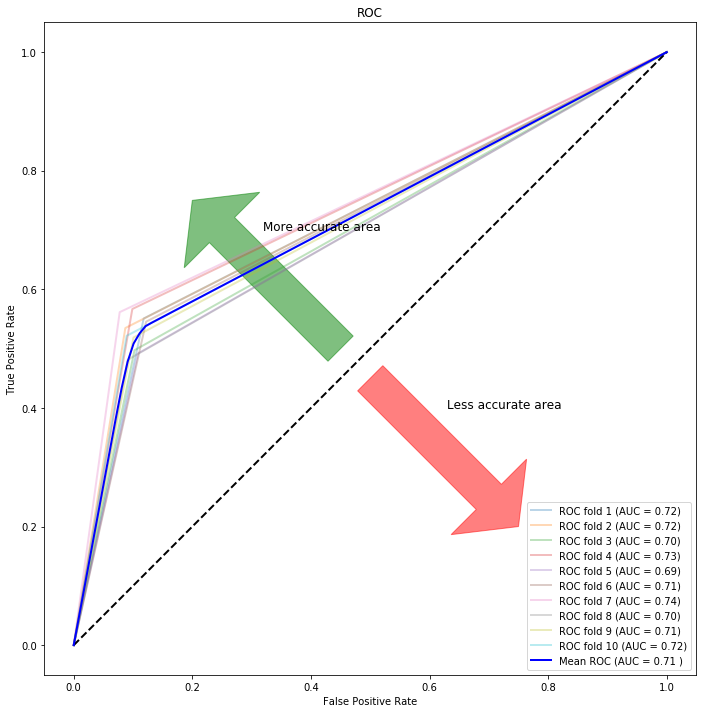

In [23]:
print("<--------------------------------------K-fold XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_selected, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_selected,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=clf.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [24]:
'''-------------------------FEATURE SELECTION(f_classif)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(f_classif, k=13)
fit=test.fit(X,Y)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_selected=X[columns_selected]

print(x_selected.shape)


(7032, 13)
